In [14]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline



In [15]:
df = pd.read_csv("/Users/mac_marco/ProgettoFia/Country-data.csv", encoding='latin1')
df.head(5)


,id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
#togliamo le colonne contenenti dati testuali per facilitare il calcolo
stringless_df = df.drop(['id','country'], axis=1)
#togliamo anche le tuple che presentano valori NaN
stringless_df = stringless_df.dropna()
stringless_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
#Caliamo i dati per una migliore distribuzione
X_std = StandardScaler().fit_transform(stringless_df)
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_std)

#Applichiamo l'analisi delle componeneti principali
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X_std)
#abbiamo a questo punto un nuovo dataframe dopo l'esecuzione di PCA
pca_df = pd.DataFrame(principalComponents)

[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 1.0, 'Elbow graph')]

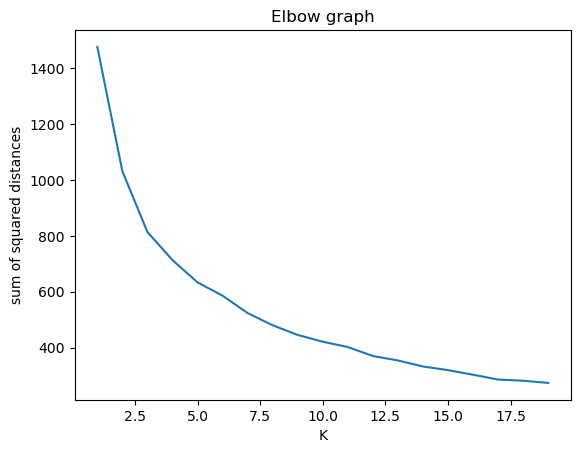

In [18]:
#calcola la somma degli errori quadrati per valutare
#il valore di k da utilizzare per il kmeans
#utilizziamo il metodo del gomito per determinare il valore di k
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)
    
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')

In [19]:
#Trovato il numero di cluster ideali possiamo eseguire il k-means
kmeans = KMeans(n_clusters=4)    
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
labels = kmeans.labels_


KMeans(n_clusters=4)

Coefficiente di forma: 0.223


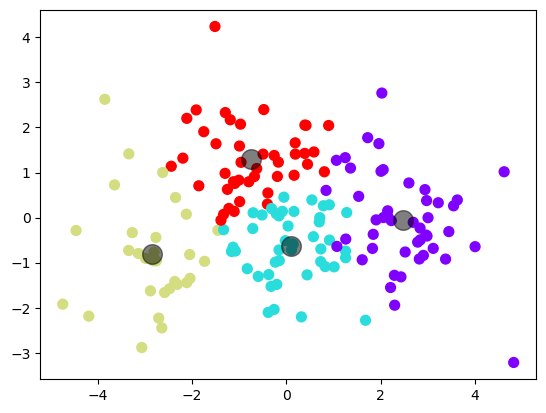

In [20]:
#mostriamo come sono stati formati i cluster
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
dataset = pca_df
#i pallini neri rappresentano i centroidi
print("Coefficiente di forma: %0.3f" % metrics.silhouette_score(pca_df, labels))


In [21]:
#Creiamo un dizionario per memorizzare le associazioni istanza - cluster
kmeans_dic = []

#Recuperiamo e memorizziamo le associazioni 
for c_row in range(len(dataset)):
    kmeans_dic.append({"id": c_row , "cluster_id": labels[c_row]})

#visualizziamo le coppie tupla - cluster    
kmeans_dic

[{'id': 0, 'cluster_id': 0},
 {'id': 1, 'cluster_id': 1},
 {'id': 2, 'cluster_id': 1},
 {'id': 3, 'cluster_id': 0},
 {'id': 4, 'cluster_id': 3},
 {'id': 5, 'cluster_id': 1},
 {'id': 6, 'cluster_id': 1},
 {'id': 7, 'cluster_id': 2},
 {'id': 8, 'cluster_id': 2},
 {'id': 9, 'cluster_id': 1},
 {'id': 10, 'cluster_id': 2},
 {'id': 11, 'cluster_id': 3},
 {'id': 12, 'cluster_id': 1},
 {'id': 13, 'cluster_id': 3},
 {'id': 14, 'cluster_id': 3},
 {'id': 15, 'cluster_id': 2},
 {'id': 16, 'cluster_id': 3},
 {'id': 17, 'cluster_id': 0},
 {'id': 18, 'cluster_id': 3},
 {'id': 19, 'cluster_id': 1},
 {'id': 20, 'cluster_id': 3},
 {'id': 21, 'cluster_id': 0},
 {'id': 22, 'cluster_id': 1},
 {'id': 23, 'cluster_id': 2},
 {'id': 24, 'cluster_id': 3},
 {'id': 25, 'cluster_id': 0},
 {'id': 26, 'cluster_id': 0},
 {'id': 27, 'cluster_id': 3},
 {'id': 28, 'cluster_id': 0},
 {'id': 29, 'cluster_id': 2},
 {'id': 30, 'cluster_id': 3},
 {'id': 31, 'cluster_id': 0},
 {'id': 32, 'cluster_id': 0},
 {'id': 33, 'cluster

In [22]:
df = pd.read_csv("/Users/mac_marco/ProgettoFia/Country-data.csv", encoding='latin1')

#togliamo le colonne contenenti dati testuali per facilitare il calcolo
stringless_df = df.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], axis=1)
stringless_df.head(5)


,id,country
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Angola
4,4,Antigua and Barbuda


In [23]:
#ritorna il cluster in cui l'input utente è stato smistato dal k-means
def getClusterId(id, dic):
    id = id - 1
    for x in dic:
        if x['id'] == id:
            return x['cluster_id']

#ritorna la lista di nazioni associati al cluster dato in input
def getNazioniId(cluster_id,dic):
    nazioni = []
    for x in dic:
        if(x['cluster_id'] == cluster_id):
            nazioni.append(x['id'])
    return nazioni


In [24]:
#funzione che una volta ricevuti i nuovi dati esegue il kmeans
#per capire dove i nuovi dati sono stati inseriti
def eseguiClustering(df):
    #togliamo le colonne contenenti dati testuali per facilitare il calcolo
    stringless_df = df.drop(['id','country'], axis=1)
    stringless_df = stringless_df.dropna()

    #scala i dati per una migliore distribuzione
    X_std = StandardScaler().fit_transform(stringless_df)
    pca = PCA(n_components=.95)
    principalComponents = pca.fit_transform(X_std)

    #Applica l'analisi delle componeneti principali
    pca = PCA(n_components=9)
    principalComponents = pca.fit_transform(X_std)
    pca_df = pd.DataFrame(principalComponents)

    #calcola la somma degli errori quadrati per valutare
    #il valore di k da utilizzare per il kmeans
    sum_of_squared_distances = []
    K = range(1,20)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(pca_df)
        sum_of_squared_distances.append(km.inertia_)

    #Trovato il numero di cluster ideali possiamo eseguire il k-means
    kmeans = KMeans(n_clusters=4)    
    kmeans.fit(pca_df)
    y_kmeans = kmeans.predict(pca_df)
    labels = kmeans.labels_

    # Recuperiamo le associazioni tra istanze e clusters
    for c_row in range(len(stringless_df)):
        kmeans_dic.append({"id": c_row  , "cluster_id": labels[c_row]})
    
    
    last_index = len(stringless_df)
  
    cluster_id = getClusterId(last_index, kmeans_dic)
   
    nazioni_trovate = getNazioniId(cluster_id,kmeans_dic)
    
    print("id_cluster dell elemento aggiunto: ",cluster_id)
    print(nazioni_trovate)

    return nazioni_trovate

In [25]:
len_df = len(df)

Nazione = []
Nazione.append(len_df)
Nazione.append('America')
Nazione.append(20.0)
Nazione.append(99.0)
Nazione.append(9.12)
Nazione.append(20)
Nazione.append(1456)
Nazione.append(1.22)
Nazione.append(87.0)
Nazione.append(1.70)
Nazione.append(1600)



df.loc[len_df] = Nazione

df.head(190)

print("Nazione Aggiunta: ",Nazione)
nazioni_scelti = eseguiClustering(df)

print("Ecco le nazioni del cluster:")
for x in nazioni_scelti:
        print(df.country[x])



,id,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
160,160,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
161,161,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
162,162,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
163,163,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


Nazione Aggiunta:  [164, 'America', 20.0, 99.0, 9.12, 20, 1456, 1.22, 87.0, 1.7, 1600]
id_cluster dell elemento aggiunto:  3
[4, 11, 13, 14, 16, 18, 20, 24, 27, 30, 43, 51, 52, 57, 65, 67, 78, 83, 85, 86, 89, 90, 91, 94, 95, 98, 99, 100, 102, 113, 115, 116, 119, 129, 131, 132, 133, 145, 149, 151, 153, 159, 161, 4, 10, 11, 13, 14, 16, 18, 20, 24, 27, 30, 41, 43, 51, 52, 57, 65, 67, 78, 83, 85, 86, 89, 90, 91, 94, 95, 98, 99, 100, 102, 113, 115, 116, 119, 128, 129, 131, 132, 133, 135, 140, 145, 149, 151, 153, 159, 161, 164]
Ecco le nazioni del cluster:
Antigua and Barbuda
Bahrain
Barbados
Belarus
Belize
Bhutan
Bosnia and Herzegovina
Bulgaria
Cambodia
Cape Verde
Czech Republic
Estonia
Fiji
Georgia
Guyana
Hungary
Jordan
Kyrgyz Republic
Latvia
Lebanon
Libya
Lithuania
Macedonia
Malaysia
Maldives
Mauritius
Micronesia
Moldova
Montenegro
Oman
Panama
Paraguay
Poland
Seychelles
Slovak Republic
Slovenia
Solomon Islands
Thailand
Tunisia
Turkmenistan
Ukraine
Vanuatu
Vietnam
Antigua and Barbuda
Baham